In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from sklearn import datasets,ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv("perth_with_mean.csv")
df.set_index(["DATE_SOLD"], inplace=True)
df

,Unnamed: 0,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,...,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,STATION_NUM,NEAREST_CEM_DIST,MEAN_PRICE,DIFFERENCE
DATE_SOLD,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,52 Graham Road,Gooseberry Hill,855000,3,2,2.0,2148,192,1976.0,...,6076,-31.942012,116.051851,TREETOPS MONTESSORI SCHOOL,3.231840,200.0,1.0,6650.114755,700941.98731,1.540580e+05
2018-01-01,1,111 Willmott Drive,Cooloongup,270000,3,1,1.0,681,90,1988.0,...,6168,-32.301900,115.757760,SOUTH COAST BAPTIST COLLEGE,1.497308,54.0,9.0,3395.069164,700941.98731,-4.309420e+05
2018-01-01,2,12 Moreto Turn,Caversham,502500,4,2,2.0,474,189,NaN,...,6055,-31.864014,115.969749,GOVERNOR STIRLING SENIOR HIGH SCHOOL,3.305409,130.0,6.0,3937.034611,700941.98731,-1.984420e+05
2018-01-01,3,6 Finchley Rise,Mount Claremont,1780000,4,2,2.0,916,263,1991.0,...,6010,-31.963740,115.780730,JOHN XXIII COLLEGE,0.572773,8.0,15.0,1898.157528,700941.98731,1.079058e+06
2018-01-01,4,32a Talbot Road,Swan View,428000,3,2,NaN,850,152,2010.0,...,6056,-31.882912,116.053054,SWAN VIEW SENIOR HIGH SCHOOL,0.967736,149.0,16.0,3867.178162,700941.98731,-2.729420e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,16162,17 Hawkes Street,Coolbellup,500000,3,1,NaN,728,112,1964.0,...,6163,-32.078860,115.798370,SETON CATHOLIC COLLEGE,0.831985,91.0,13.0,5068.384259,623672.87500,-1.236729e+05
2020-12-01,16163,11 Eddington Road,Warwick,695000,4,2,2.0,509,174,2000.0,...,6024,-31.839880,115.810180,WARWICK SENIOR HIGH SCHOOL,0.513788,138.0,20.0,5360.521404,623672.87500,7.132712e+04
2020-12-01,16164,14/314 Wright Road,Piara Waters,360000,3,2,2.0,161,113,2013.0,...,6112,-32.123387,115.924370,CAREY BAPTIST COLLEGE,1.681970,62.0,16.0,17823.811710,623672.87500,-2.636729e+05


In [3]:
df = pd.DataFrame(df,columns = [ "PRICE","BATHROOMS","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK","NEAREST_STN_DIST","NEAREST_CEM_DIST","MEAN_PRICE",'DIFFERENCE'])
df

,PRICE,BATHROOMS,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,NEAREST_STN_DIST,NEAREST_CEM_DIST,MEAN_PRICE,DIFFERENCE
DATE_SOLD,,,,,,,,,
2018-01-01,855000,2,192,18300,200.0,7400,6650.114755,700941.98731,1.540580e+05
2018-01-01,270000,1,90,40100,54.0,1300,3395.069164,700941.98731,-4.309420e+05
2018-01-01,502500,2,189,14300,130.0,3800,3937.034611,700941.98731,-1.984420e+05
2018-01-01,1780000,2,263,7500,8.0,1900,1898.157528,700941.98731,1.079058e+06
2018-01-01,428000,2,152,19900,149.0,5000,3867.178162,700941.98731,-2.729420e+05
...,...,...,...,...,...,...,...,...,...
2020-12-01,500000,1,112,15200,91.0,5100,5068.384259,623672.87500,-1.236729e+05
2020-12-01,695000,2,174,13300,138.0,1400,5360.521404,623672.87500,7.132712e+04
2020-12-01,360000,2,113,19900,62.0,6400,17823.811710,623672.87500,-2.636729e+05


In [4]:
#split the train and test data
data = df.truncate(after = '2020-12')
Appli_data = df.truncate(before = '2020-12')
X = data.drop(["PRICE",'DIFFERENCE'],1)
Y = data["PRICE"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0)

# Standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


### Model Training

In [5]:
#Method 1
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test,y_pred)
train_mse=mean_squared_error(y_train, y_train_pred)
test_mse=mean_squared_error(y_test,y_pred)
train_mae=mean_absolute_error(y_train, y_train_pred)
test_mae=mean_absolute_error(y_test,y_pred)
train_mape=mean_absolute_percentage_error(y_train, y_train_pred)
test_mape=mean_absolute_percentage_error(y_test,y_pred)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.7841928903926527
test r2: 0.7307427850878103
train_mse: 25845932433.031178
test_mse: 32618917052.84228
train_mae: 110491.45697579326
test_mae: 119338.12700322398
train_mape: 0.18834071094146182
test_mape: 0.2007819242376244


In [7]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=20,weights='distance',p=1)
neigh=KNeighborsRegressor(n_neighbors=13,p=1)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
y_train_pred = neigh.predict(x_train)


In [8]:
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test,y_pred)
train_mse=mean_squared_error(y_train, y_train_pred)
test_mse=mean_squared_error(y_test,y_pred)
train_mae=mean_absolute_error(y_train, y_train_pred)
test_mae=mean_absolute_error(y_test,y_pred)
train_mape=mean_absolute_percentage_error(y_train, y_train_pred)
test_mape=mean_absolute_percentage_error(y_test,y_pred)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.7658858755426172
test r2: 0.7262993742732566
train_mse: 28038454587.30781
test_mse: 33157209959.269684
train_mae: 105027.81124681006
test_mae: 113590.99781279903
train_mape: 0.165987830038052
test_mape: 0.18092350276108507


In [9]:
best_p = -1
best_score = 0.0
best_k = -1
for k in range(5, 21):
    for p in range(1, 6):
        neigh = KNeighborsRegressor(n_neighbors = k, p = p)
        neigh.fit(x_train, y_train)
        knn_score = neigh.score(x_test, y_test)
        if knn_score > best_score:
            best_score = knn_score
            best_k = k
            best_p = p


In [10]:
print(best_score)
print(best_k)          
print(best_p)

0.7286112328681212
10
1


In [11]:
#Gradien Boosting
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(n_estimators=550,max_depth=4,max_features='log2',learning_rate=0.15)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_train_pred = reg.predict(x_train)
    

In [12]:
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test,y_pred)
train_mse=mean_squared_error(y_train, y_train_pred)
test_mse=mean_squared_error(y_test,y_pred)
train_mae=mean_absolute_error(y_train, y_train_pred)
test_mae=mean_absolute_error(y_test,y_pred)
train_mape=mean_absolute_percentage_error(y_train, y_train_pred)
test_mape=mean_absolute_percentage_error(y_test,y_pred)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.9056645379753725
test r2: 0.8062887860796923
train_mse: 11297996539.425827
test_mse: 23466966414.001373
train_mae: 72022.37601150972
test_mae: 97138.42947559217
train_mape: 0.12233951086665049
test_mape: 0.15749891773945698


In [13]:
#XGBoost
from xgboost import XGBRegressor
regr_m1=XGBRegressor(n_estimators=500,max_depth=5,learning_rate=0.06,subsample=0.6,min_child_weight=6)
regr_m1.fit(x_train, y_train)
y_pred = regr_m1.predict(x_test)
y_train_pred = regr_m1.predict(x_train)

In [14]:
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test,y_pred)
train_mse=mean_squared_error(y_train, y_train_pred)
test_mse=mean_squared_error(y_test,y_pred)
train_mae=mean_absolute_error(y_train, y_train_pred)
test_mae=mean_absolute_error(y_test,y_pred)
train_mape=mean_absolute_percentage_error(y_train, y_train_pred)
test_mape=mean_absolute_percentage_error(y_test,y_pred)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.8934761043218078
test r2: 0.8060257464162018
train_mse: 12757732658.628235
test_mse: 23498832111.519638
train_mae: 75987.15314774458
test_mae: 96236.02053186088
train_mape: 0.1299181982832818
test_mape: 0.1566152804999442


In [15]:
# method 2

In [16]:
#train_test_split
X = data.drop(['DIFFERENCE'],1)
Y = data["DIFFERENCE"]
x_train1, x_test1, y_train, y_test = train_test_split(X,Y, random_state=0)
x_train=x_train1.drop(["PRICE","MEAN_PRICE"],1)
x_test=x_test1.drop(["PRICE","MEAN_PRICE"],1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [17]:
# Standardization
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_depth=10, max_features='log2',oob_score=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)

In [19]:
train_pred_price=x_train1['MEAN_PRICE']+y_train_pred
test_pred_price=x_test1['MEAN_PRICE']+y_pred
train_real_price=x_train1['PRICE']
test_real_price=x_test1['PRICE']
train_r2_score = r2_score(train_real_price, train_pred_price)
test_r2_score = r2_score(test_real_price,test_pred_price)
train_mse=mean_squared_error(train_real_price, train_pred_price)
test_mse=mean_squared_error(test_real_price,test_pred_price)
train_mae=mean_absolute_error(train_real_price, train_pred_price)
test_mae=mean_absolute_error(test_real_price,test_pred_price)
train_mape=mean_absolute_percentage_error(train_real_price, train_pred_price)
test_mape=mean_absolute_percentage_error(test_real_price,test_pred_price)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.8546219351181419
test r2: 0.7696806485579686
train_mse: 17411065135.98106
test_mse: 27901825482.38168
train_mae: 91927.34712326036
test_mae: 109267.50363682791
train_mape: 0.15882913145074262
test_mape: 0.18302443283204498


In [20]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=20,weights='distance',p=1)
neigh=KNeighborsRegressor(n_neighbors=10,p=1)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
y_train_pred = neigh.predict(x_train)


In [21]:
train_pred_price=x_train1['MEAN_PRICE']+y_train_pred
test_pred_price=x_test1['MEAN_PRICE']+y_pred
train_real_price=x_train1['PRICE']
test_real_price=x_test1['PRICE']
train_r2_score = r2_score(train_real_price, train_pred_price)
test_r2_score = r2_score(test_real_price,test_pred_price)
train_mse=mean_squared_error(train_real_price, train_pred_price)
test_mse=mean_squared_error(test_real_price,test_pred_price)
train_mae=mean_absolute_error(train_real_price, train_pred_price)
test_mae=mean_absolute_error(test_real_price,test_pred_price)
train_mape=mean_absolute_percentage_error(train_real_price, train_pred_price)
test_mape=mean_absolute_percentage_error(test_real_price,test_pred_price)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.7984870284824936
test r2: 0.7577743116436509
train_mse: 24134008632.51026
test_mse: 29344207690.55381
train_mae: 97092.24370007584
test_mae: 106122.31555870913
train_mape: 0.1540946987785341
test_mape: 0.1700070630975228


In [22]:
#Gradient Boosting
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(n_estimators=600,max_depth=4,subsample=0.7)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
y_train_pred = reg.predict(x_train)
    

In [23]:
train_pred_price=x_train1['MEAN_PRICE']+y_train_pred
test_pred_price=x_test1['MEAN_PRICE']+y_pred
train_real_price=x_train1['PRICE']
test_real_price=x_test1['PRICE']
train_r2_score = r2_score(train_real_price, train_pred_price)
test_r2_score = r2_score(test_real_price,test_pred_price)
train_mse=mean_squared_error(train_real_price, train_pred_price)
test_mse=mean_squared_error(test_real_price,test_pred_price)
train_mae=mean_absolute_error(train_real_price, train_pred_price)
test_mae=mean_absolute_error(test_real_price,test_pred_price)
train_mape=mean_absolute_percentage_error(train_real_price, train_pred_price)
test_mape=mean_absolute_percentage_error(test_real_price,test_pred_price)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.9070459529973127
test r2: 0.805202778243993
train_mse: 11132552688.275587
test_mse: 23598529831.98803
train_mae: 74946.5282729964
test_mae: 98168.20649270501
train_mape: 0.13074203408629756
test_mape: 0.1613553126151748


In [24]:
#XGBoost
from xgboost import XGBRegressor
regr=XGBRegressor(n_estimators=450,max_depth=4,learning_rate=0.08,subsample=0.6,min_child_weight=5)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
y_train_pred = regr.predict(x_train)

In [25]:
train_pred_price=x_train1['MEAN_PRICE']+y_train_pred
test_pred_price=x_test1['MEAN_PRICE']+y_pred
train_real_price=x_train1['PRICE']
test_real_price=x_test1['PRICE']
train_r2_score = r2_score(train_real_price, train_pred_price)
test_r2_score = r2_score(test_real_price,test_pred_price)
train_mse=mean_squared_error(train_real_price, train_pred_price)
test_mse=mean_squared_error(test_real_price,test_pred_price)
train_mae=mean_absolute_error(train_real_price, train_pred_price)
test_mae=mean_absolute_error(test_real_price,test_pred_price)
train_mape=mean_absolute_percentage_error(train_real_price, train_pred_price)
test_mape=mean_absolute_percentage_error(test_real_price,test_pred_price)
print('train r2:', train_r2_score)
print('test r2:', test_r2_score)
print('train_mse:',train_mse)
print('test_mse:',test_mse)
print('train_mae:',train_mae)
print('test_mae:',test_mae)
print('train_mape:',train_mape)
print('test_mape:',test_mape)

train r2: 0.8638537006871967
test r2: 0.8010821756137594
train_mse: 16305431546.941734
test_mse: 24097716438.546165
train_mae: 86344.96101276902
test_mae: 99673.03410309622
train_mape: 0.14702427705678325
test_mape: 0.16507235357114047


### Application

In [26]:
X = Appli_data.drop(["PRICE",'DIFFERENCE','MEAN_PRICE'],1)
Y = Appli_data["DIFFERENCE"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [27]:
sc = StandardScaler()
X_demo = sc.fit_transform(X)
Y_pred = regr.predict(X_demo)

In [28]:
Y_pred_price=Y_pred+Appli_data['MEAN_PRICE']
Y_real_price=Appli_data['PRICE']
r2_score_demo = r2_score(Y_real_price,Y_pred_price)
mse=mean_squared_error(Y_real_price,Y_pred_price)
mae=mean_absolute_error(Y_real_price,Y_pred_price)
mape=mean_absolute_percentage_error(Y_real_price,Y_pred_price)
print('r2:',r2_score_demo)
print('mse:',mse)
print('mae:',mae)
print('mape:',mape)

r2: 0.6123253258809545
mse: 34048686771.265804
mae: 125367.07099559007
mape: 0.24188009875334837


In [29]:
df = {'real':Y_real_price,'predicted':Y_pred_price,'mean':Appli_data['MEAN_PRICE']}
a = pd.DataFrame(df)

In [30]:
a.reset_index(drop=True,inplace=True)
#a.to_csv('application.csv')

In [31]:
#a=pd.read_csv('application.csv',index_col=0)
a

,real,predicted,mean
0,325000,425767.109375,623672.875
1,290000,441616.140625,623672.875
2,300000,371399.625000,623672.875
3,630000,621064.655029,623672.875
4,720000,625247.885498,623672.875
...,...,...,...
407,500000,508578.320312,623672.875
408,695000,645976.767578,623672.875
409,360000,312727.062500,623672.875
410,315000,652247.939453,623672.875


In [32]:
x=np.linspace(1,412,412)
y = x * 0

In [33]:
a['difference']=a['predicted']-a['real']

In [34]:
index1=np.where(a['difference']>=0)[0]
len(index1)/412
#预测偏高

0.6286407766990292

Text(0.5, 1.0, 'Difference between True Prices and Predicted Prices')

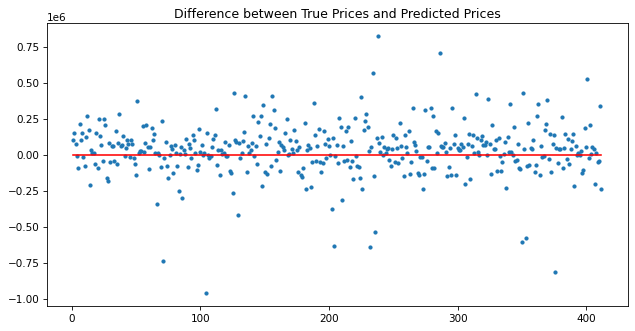

In [35]:
fig2 = plt.figure(num='fig111111', figsize=(10, 5), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.scatter(x,a['difference'],marker='.')
plt.plot(x,y,color = 'r')
plt.title('Difference between True Prices and Predicted Prices')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7622d86f-bc43-4970-be08-1eec18806f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>